## common data for question q11 to q17

Run the following cell to get the training and test dataset. The following variables are used in the cell:

X_train = Training dataset

y_train = label vector corresponding to training dataset

X_test = Test dataset

y_test = label vector corresponding to test dataset

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# DATA CELL
# DO NOT EDIT THIS CELL
X_train = np.array([
    [1, 0, 1, -1, 2],
    [2, 1, 0, -1, 2],
    [0, 1, 2, 3, 1]
])
y_train = np.array([1, 2, 0, 3, 1])
X_test = np.array([
    [1, 0, 2, 1, 4],
    [0, 1, 3, 1, 2],
    [-1, 0, 3, 1, -1]
])
y_test = np.array([-1, 0, 2, 1, 2])

In [70]:
#Q12 
d , n  = X_train.shape
print(d) # no of weight component

3


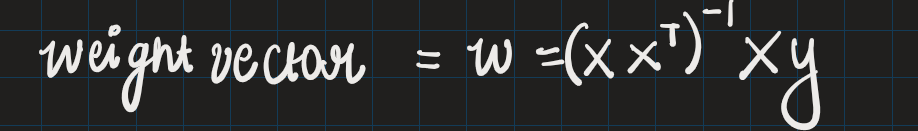

In [71]:
w_normal_eq = np.linalg.pinv(X_train @ X_train.T) @ X @ y_train
w_normal_eq

array([ 1.49180328, -0.3442623 , -0.03278689])

In [72]:
w = np.linalg.pinv(X_train.T) @ y_train 
w

array([-1.42622951,  1.29836066,  0.89508197])

In [73]:
# Q13 norm of weight vector
norm_w = np.linalg.norm(w)
print(f"{norm_w=:.2f}")

norm_w=2.13


In [74]:
#predict y in term of new weight vector w
y_pred = np.array([w[i] * (X_test**i) for i in range(w.shape[0])]).sum(axis=0)
y_pred

array([[ 0.76721311, -1.42622951,  4.75081967,  0.76721311, 18.08852459],
       [-1.42622951,  0.76721311, 10.52459016,  0.76721311,  4.75081967],
       [-1.8295082 , -1.42622951, 10.52459016,  0.76721311, -1.8295082 ]])

In [75]:
def rmserror(X , Y , w ):
    d , n= X.shape 
    y_pred_train = X.T @ w
    err = y_pred_train- Y
    return  np.sqrt((err**2).sum()/n)
round(rmserror(X_train , y_train , w),3) #Q14

0.27

In [76]:
#another way Q 14
y_pred_train = X_train.T @ w
rsme = np.sqrt(np.mean((y_pred_train - y_train)**2))
rsme

0.2697904469137141

In [77]:
# Q15 rsme of test dataset
round(rmserror(X_test , y_test , w),2)

2.92

In [78]:
#Q16 ridge regression 
def get_ridge_w(X , y , lamb):
    d , n = X.shape
    w_ridge = np.linalg.inv(X @ X.T +  lamb  * np.eye(d)) @ X @ y
    rmse_train = rmserror(X , y , w_ridge)
    return rmse_train
    # rmse_test = rmserror(X_test , y_test , w_ridge)
lambs = [0.01 , 0.1 , 1 , 10]
rsme_training = []
for i  in lambs:
    rsme_training.append(get_ridge_w(X_train , y_train , i))
print(rsme_training)
print(min(rsme_training))
    

[0.2699014953048992, 0.2793599939901419, 0.5209746818107291, 1.0792107164703395]
0.2699014953048992


In [79]:
# Q17
lambs = [0.01 , 0.1 , 1 , 10]
rsme_test = []
for i  in lambs:
    rsme_test.append(get_ridge_w(X_test , y_test, i))
print(rsme_test)
print(min(rsme_test))
### Wrong answer ### w_ridge will only use traing dataset not the test dataset
    

[0.5313728640987685, 0.5316710316805247, 0.5381759603499354, 0.6176753609587904]
0.5313728640987685


In [81]:
# Q16-17: Ridge for different lambdas
best_lambda_train = None
best_train_rmse = float('inf')
best_lambda_test = None

best_test_rmse = float('inf')


for lamb in [0.01, 0.1, 1, 10]:
    w_ridge = np.linalg.inv(X_train @ X_train.T + lamb * np.eye(d)) @ X_train @ y_train
    rmse_train = np.sqrt(np.mean((X_train.T @ w_ridge - y_train)**2))
    rmse_test = np.sqrt(np.mean((X_test.T @ w_ridge - y_test)**2))

    if rmse_train < best_train_rmse:
        best_train_rmse = rmse_train
        best_lambda_train = lamb
    if rmse_test < best_test_rmse:
        best_test_rmse = rmse_test
        best_lambda_test = lamb
    
print("Train: lambda with least error =", best_lambda_train) # Q16
print("Test: lambda with least error =", best_lambda_test) # Q17

Train: lambda with least error = 0.01
Test: lambda with least error = 10
